# Heart Failure Prediction Project

In this project, we develop a machine learning pipeline to predict the likelihood of heart failure events based on clinical records.  
We address class imbalance using SMOTE, compare multiple models, and save the best-performing model.

# Data Loading and Overview

We load the Heart Failure Clinical Records dataset and inspect its structure and health.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Show first few rows
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# Dataset shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

# Dataset information
data.info()

Dataset has 299 rows and 13 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
me

In [3]:
# Check missing values
missing = data.isnull().sum()
print("Missing values in each column:\n", missing)

Missing values in each column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [4]:
# Summary statistics
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis (EDA)

We explore class distribution, feature distributions, and correlations between variables.

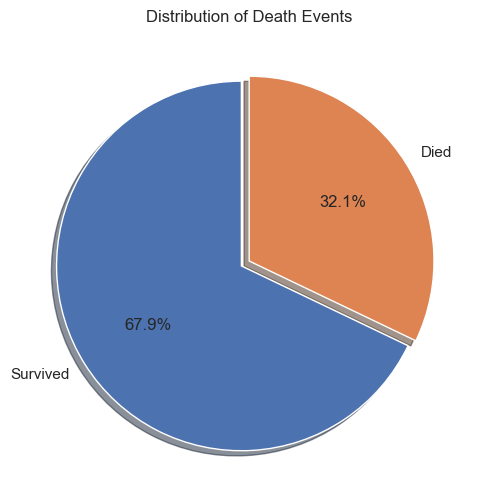

In [5]:
# Pie chart of Death Events
labels = ['Survived', 'Died']
sizes = data['DEATH_EVENT'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05, 0), shadow=True)
plt.title('Distribution of Death Events')
plt.show()

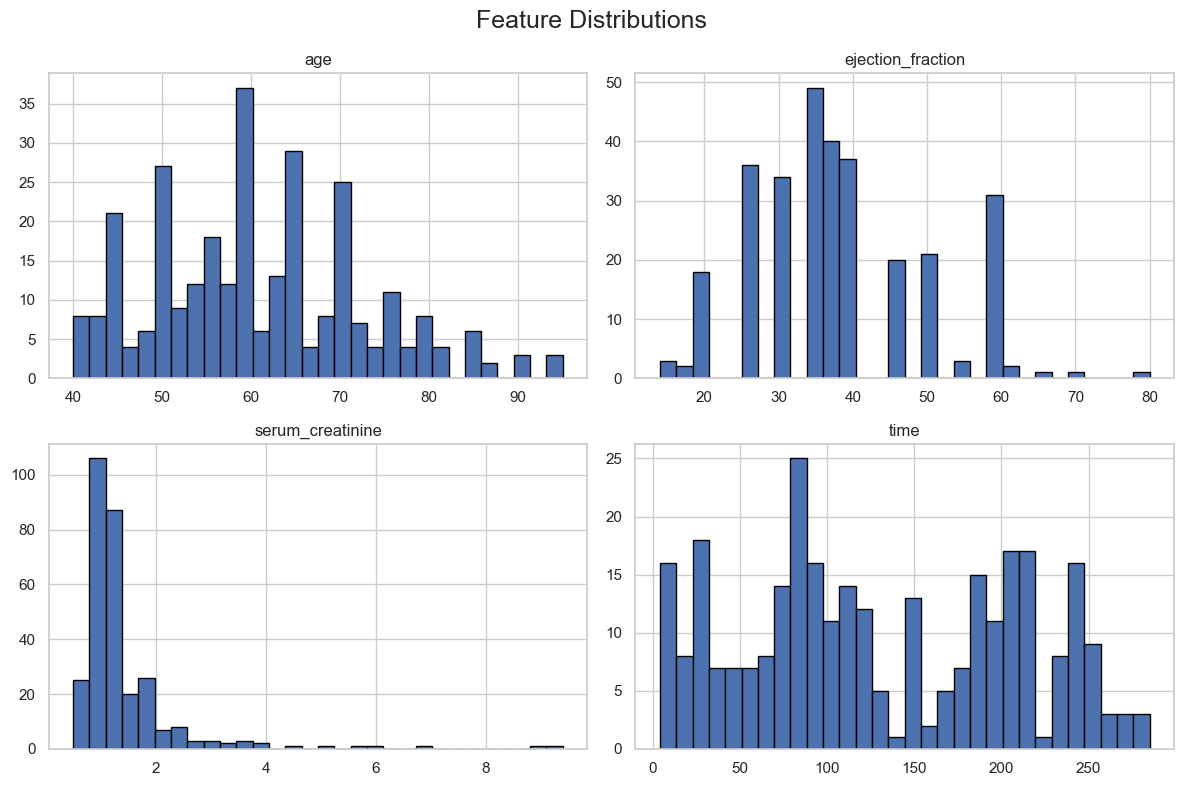

In [6]:
# Plot distributions of a few key features
important_features = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

data[important_features].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()
plt.show()

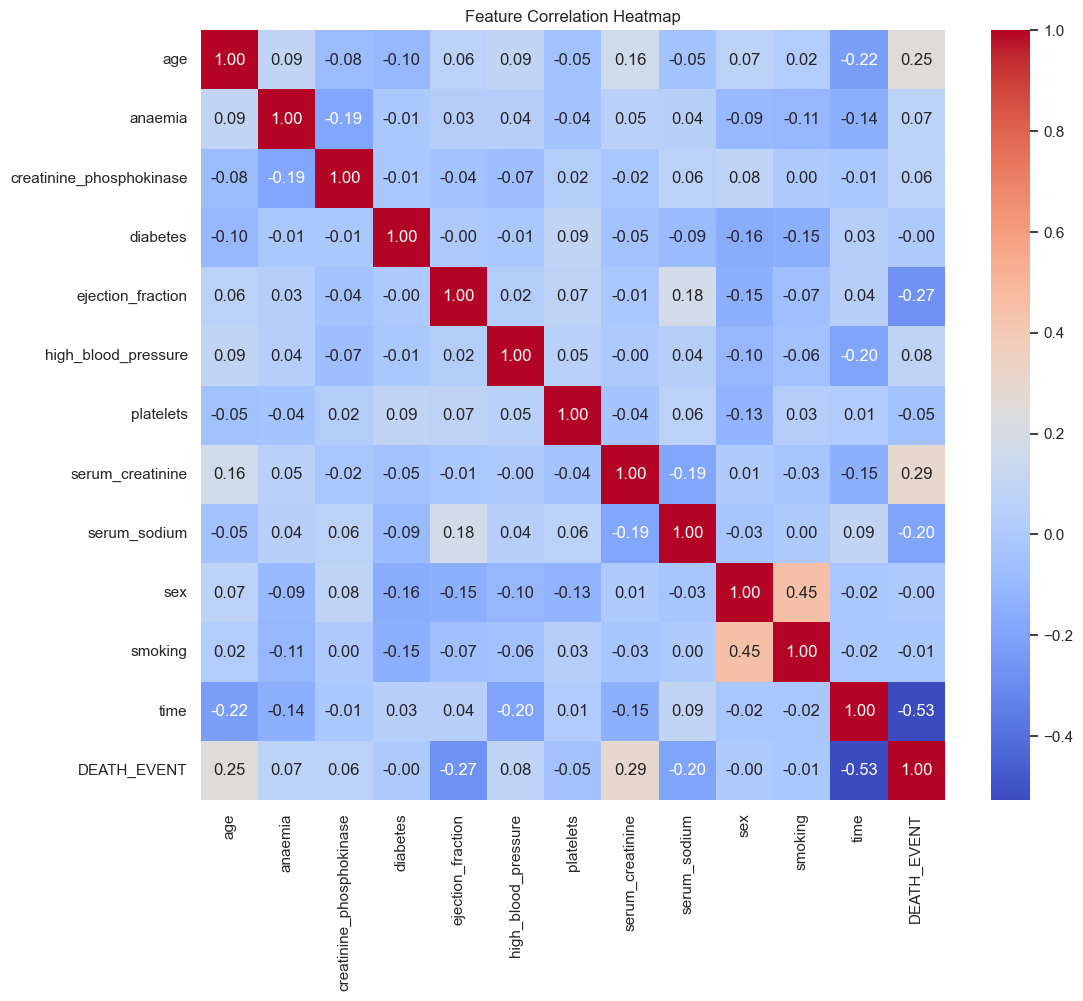

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Handling Class Imbalance

We apply SMOTE (Synthetic Minority Oversampling Technique) to balance the training dataset and address class imbalance.

In [8]:
# Define features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 239
Testing samples: 60


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE Oversampling:")
print(f"X_train shape: {X_train_smote.shape}")
print(f"y_train distribution:\n{y_train_smote.value_counts()}")

After SMOTE Oversampling:
X_train shape: (324, 12)
y_train distribution:
DEATH_EVENT
0    162
1    162
Name: count, dtype: int64


# Model Building and Evaluation

We train four different machine learning models (Logistic Regression, Random Forest, XGBoost, Gradient Boosting),  
and evaluate their performance using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [11]:
def evaluate_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [12]:
# Logistic Regression pipeline
logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

logreg.fit(X_train_smote, y_train_smote)

# Predict
logreg_preds = logreg.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
evaluate_model(y_test, logreg_preds)

Logistic Regression Results:
Accuracy: 0.7833
Precision: 0.6875
Recall: 0.5789
F1-Score: 0.6286
Confusion Matrix:
[[36  5]
 [ 8 11]]


In [13]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict
rf_preds = rf.predict(X_test)

# Evaluate
print("\nRandom Forest Results:")
evaluate_model(y_test, rf_preds)


Random Forest Results:
Accuracy: 0.8333
Precision: 0.8000
Recall: 0.6316
F1-Score: 0.7059
Confusion Matrix:
[[38  3]
 [ 7 12]]


In [14]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train_smote, y_train_smote)

# Predict
xgb_preds = xgb.predict(X_test)

# Evaluate
print("\nXGBoost Results:")
evaluate_model(y_test, xgb_preds)


XGBoost Results:
Accuracy: 0.8000
Precision: 0.6842
Recall: 0.6842
F1-Score: 0.6842
Confusion Matrix:
[[35  6]
 [ 6 13]]


In [15]:
# Gradient Boosting
gbdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbdt.fit(X_train_smote, y_train_smote)

# Predict
gbdt_preds = gbdt.predict(X_test)

# Evaluate
print("\nGradient Boosting (GBDT) Results:")
evaluate_model(y_test, gbdt_preds)


Gradient Boosting (GBDT) Results:
Accuracy: 0.8000
Precision: 0.6842
Recall: 0.6842
F1-Score: 0.6842
Confusion Matrix:
[[35  6]
 [ 6 13]]


# ROC-AUC Curves

We plot and compare ROC curves for all models to visually assess their classification performance.

In [16]:
from sklearn.metrics import roc_curve, auc

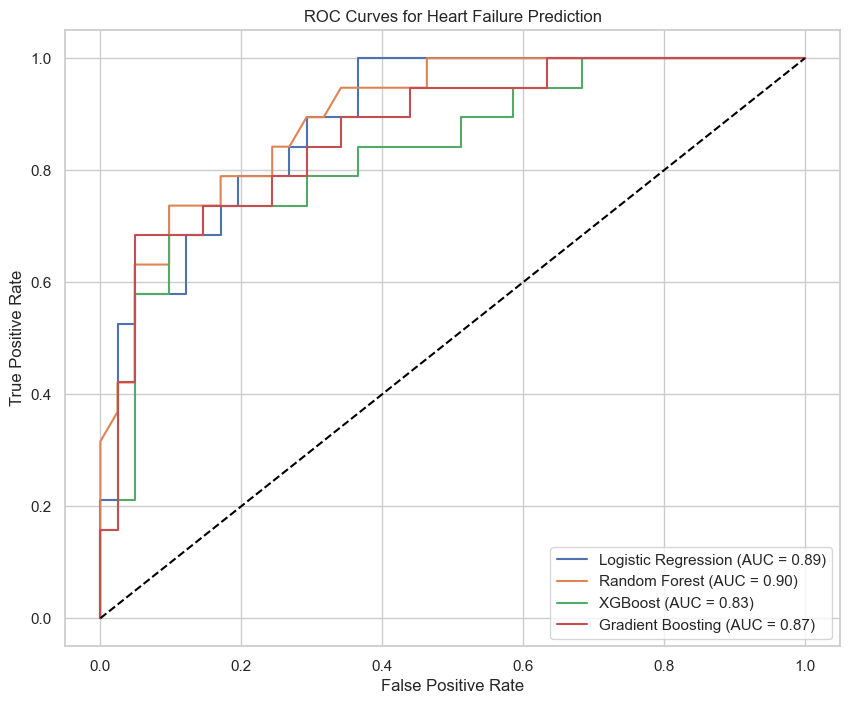

In [17]:
# Create a ROC curve plot
plt.figure(figsize=(10, 8))

# Logistic Regression
logreg_probs = logreg.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, logreg_probs)
auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc1:.2f})')

# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, rf_probs)
auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label=f'Random Forest (AUC = {auc2:.2f})')

# XGBoost
xgb_probs = xgb.predict_proba(X_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, xgb_probs)
auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label=f'XGBoost (AUC = {auc3:.2f})')

# Gradient Boosting
gbdt_probs = gbdt.predict_proba(X_test)[:, 1]
fpr4, tpr4, _ = roc_curve(y_test, gbdt_probs)
auc4 = auc(fpr4, tpr4)
plt.plot(fpr4, tpr4, label=f'Gradient Boosting (AUC = {auc4:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC Curves for Heart Failure Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Final Model Selection and Saving

Based on evaluation metrics and ROC-AUC scores, we select the best-performing model and save it for deployment.

In [18]:
# Create a simple results summary table (fill in your actual numbers)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
    'AUC': [auc1, auc2, auc3, auc4]
})

# Sort by AUC
results = results.sort_values(by='AUC', ascending=False)

print(results)

                 Model       AUC
1        Random Forest  0.899230
0  Logistic Regression  0.889602
3    Gradient Boosting  0.870347
2              XGBoost  0.834403


In [19]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'heart_failure_best_model.pkl')

print("Best model saved as 'heart_failure_best_model.pkl'.")

Best model saved as 'heart_failure_best_model.pkl'.


# Conclusion

In this project, Random Forest achieved the highest ROC-AUC score, indicating strong performance in predicting heart failure events.

Key learnings:
- Handling class imbalance (using SMOTE) significantly improved model fairness and performance.
- Both traditional and advanced ensemble models (XGBoost, GBDT) performed well, but Random Forest was the best for this dataset.
- ROC-AUC analysis provided valuable insight beyond basic accuracy scores.

Future work could include:
- Incorporating additional medical history features,
- Testing deep learning models (e.g., simple neural networks),
- Deploying the model as a healthcare web app.